# Diagnose Breast Cancer
I build **K-NN and SVM** classification models to diagnose breast cancer. 

Database reference: https://www.kaggle.com/roustekbio/breast-cancer-csv

**Feature Information:**

1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_predict, KFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('data/breastCancerKaggle.csv')
df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
df.drop('id', axis=1, inplace=True)

In [4]:
df.shape

(699, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   clump_thickness    699 non-null    int64 
 1   size_uniformity    699 non-null    int64 
 2   shape_uniformity   699 non-null    int64 
 3   marginal_adhesion  699 non-null    int64 
 4   epithelial_size    699 non-null    int64 
 5   bare_nucleoli      699 non-null    object
 6   bland_chromatin    699 non-null    int64 
 7   normal_nucleoli    699 non-null    int64 
 8   mitoses            699 non-null    int64 
 9   class              699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [6]:
# bland_chromatin is expected to be numeric
df[~df['bare_nucleoli'].str.isdigit()]['bare_nucleoli'].value_counts()

?    16
Name: bare_nucleoli, dtype: int64

There are 16 missing values in "bare_nucleoli".

In [7]:
df = df.replace('?', np.nan)
df = df.fillna(df.median())
df['bare_nucleoli'] = df['bare_nucleoli'].astype(np.int64)
df.dtypes

clump_thickness      int64
size_uniformity      int64
shape_uniformity     int64
marginal_adhesion    int64
epithelial_size      int64
bare_nucleoli        int64
bland_chromatin      int64
normal_nucleoli      int64
mitoses              int64
class                int64
dtype: object

In [8]:
df['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

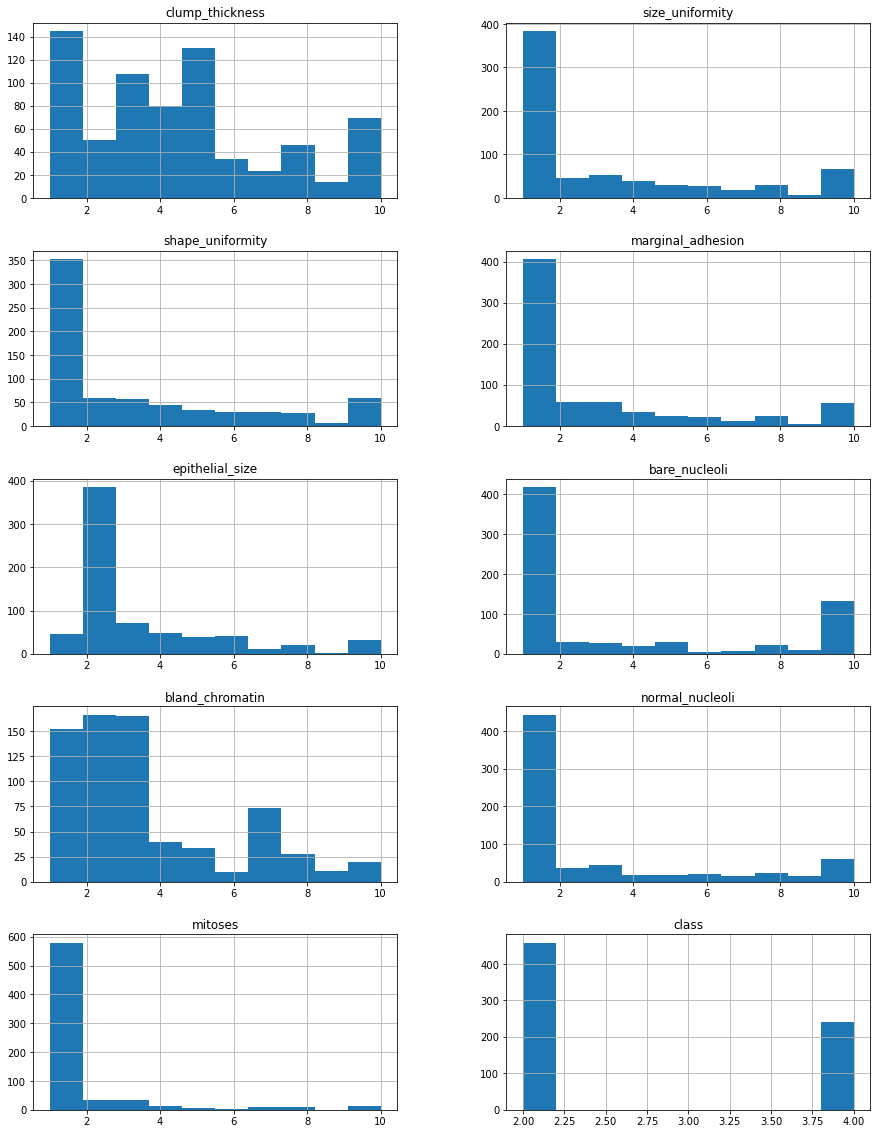

In [9]:
df.hist(layout=(5,2), figsize=(15,20));

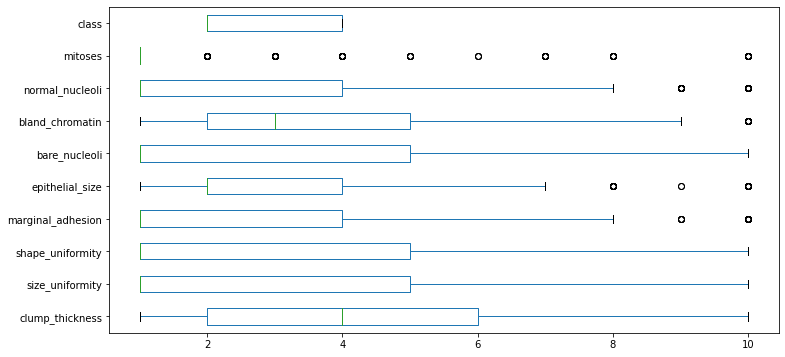

In [10]:
df.boxplot(vert=False, figsize=(12,6), grid=False);

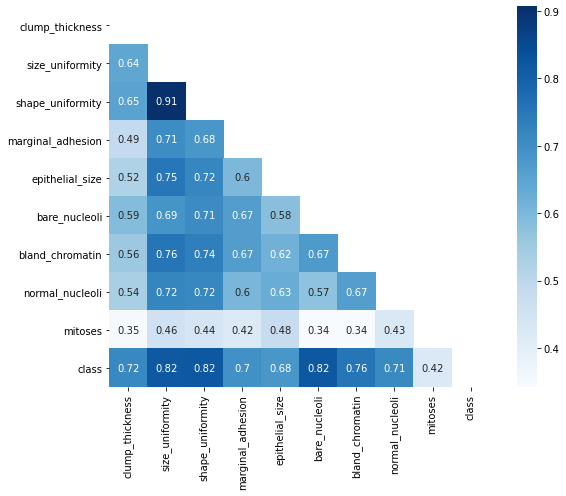

In [11]:
mask = np.triu(np.ones_like(df.corr()))
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, square=True, cmap='Blues', mask=mask);

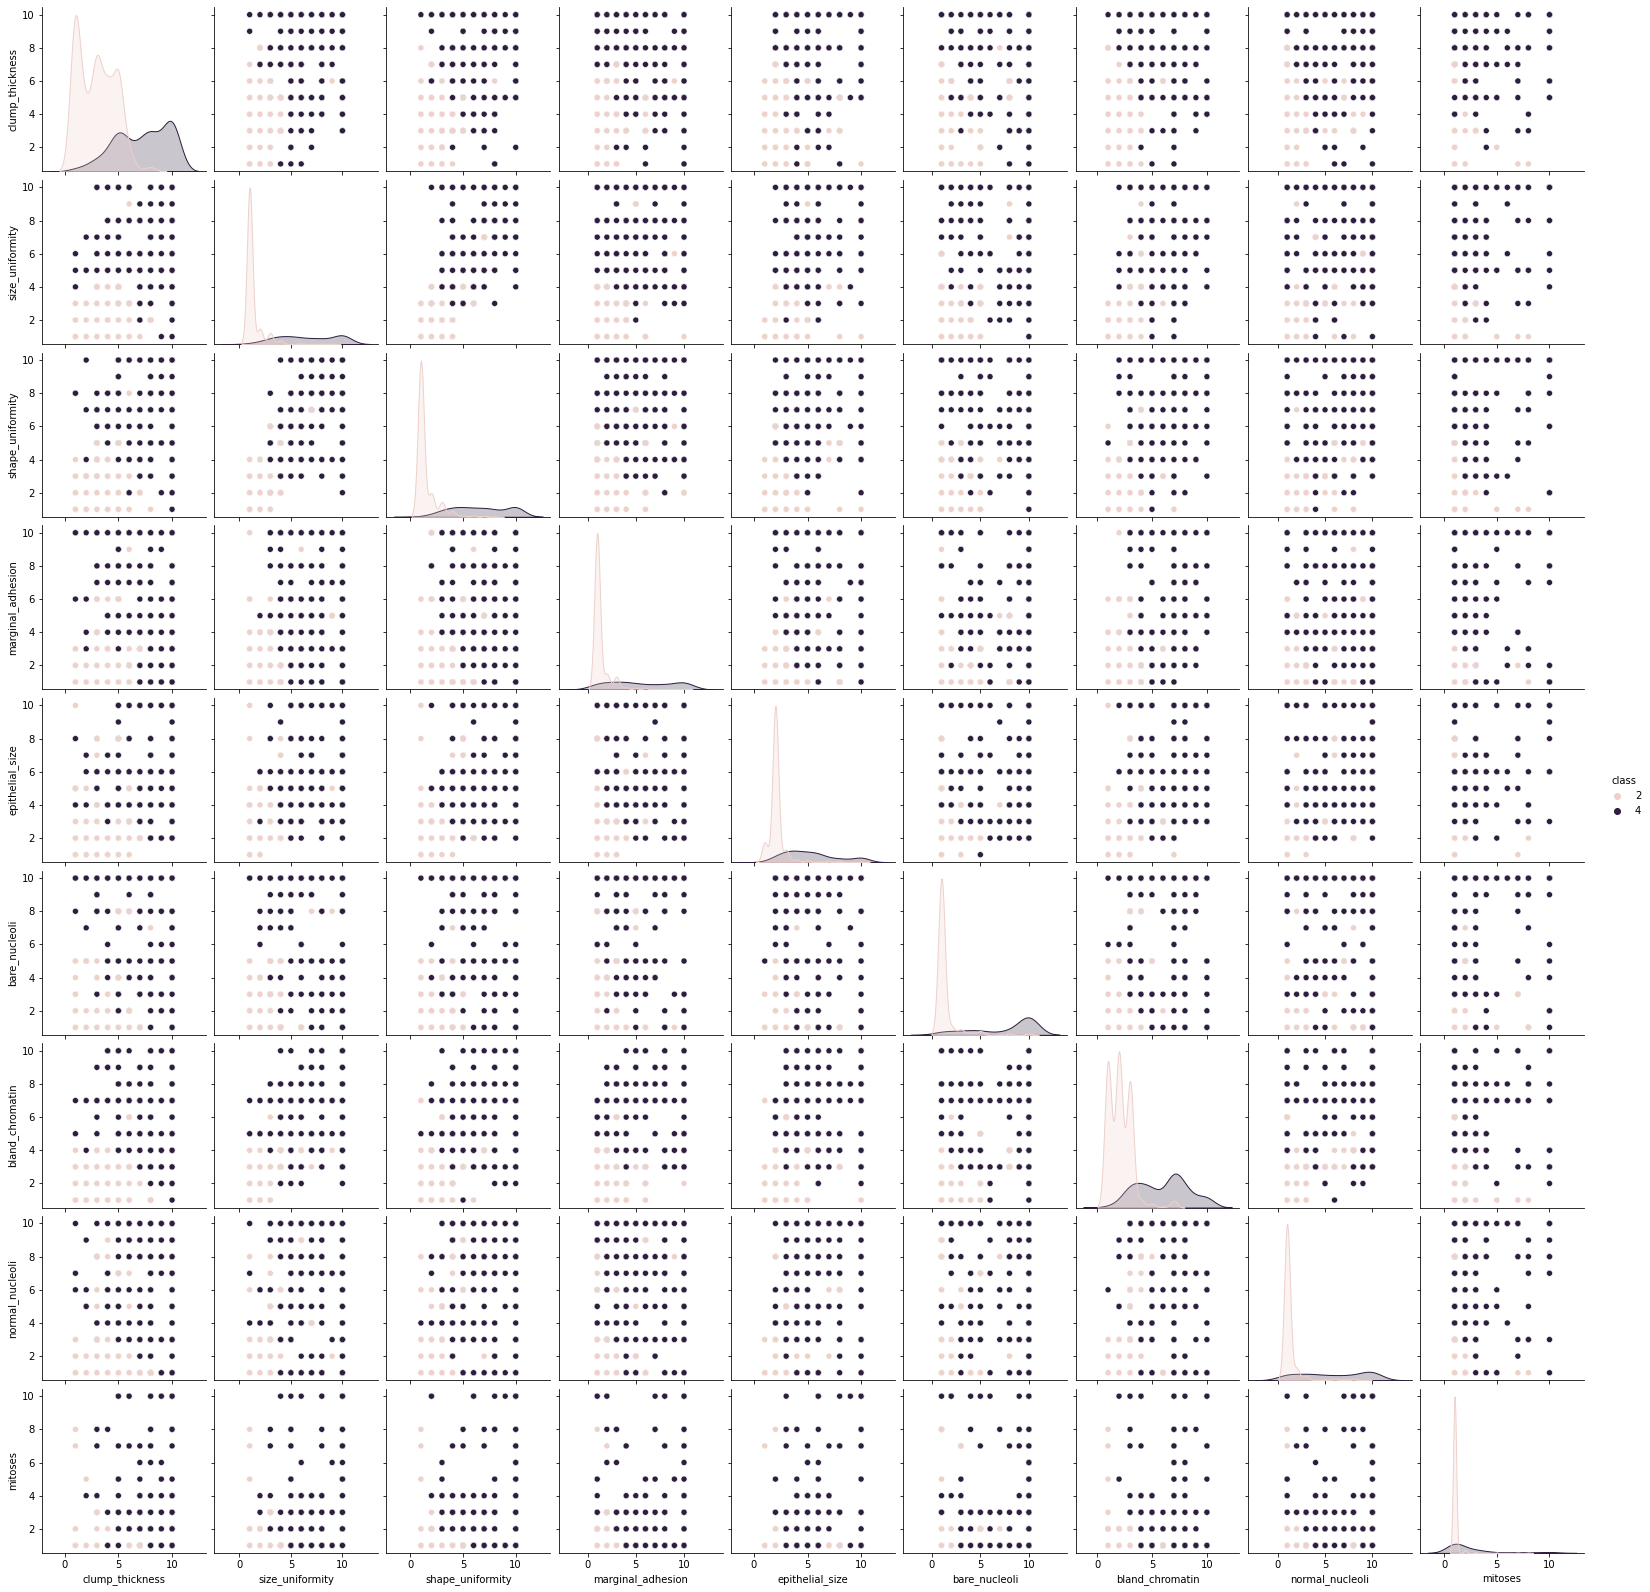

In [12]:
sns.pairplot(df, hue='class');

## Building Classification Models

In [13]:
X = df.drop('class', axis=1)
Y = df['class']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.25, random_state=1)
x_train.shape, x_test.shape

((524, 9), (175, 9))

In [14]:
def show_result(y_predicted, y_true=y_test):
    '''
    prints a text report showing the main classification metrics, followed by the confusion matrix
    '''
    print(classification_report(y_true, y_predicted))
    cm = confusion_matrix(y_true, y_predicted)
    ConfusionMatrixDisplay(cm, display_labels=['benign','malignant']).plot();

### 5-Fold Cross Validation

In [15]:
k = KFold(n_splits=5, shuffle=True, random_state=2)

### K-NN Model

Result of training and testing a KNN model with 5-fold cross-valication:
---
              precision    recall  f1-score   support

           2       0.98      0.97      0.97       340
           4       0.95      0.96      0.95       184

    accuracy                           0.97       524
   macro avg       0.96      0.97      0.96       524
weighted avg       0.97      0.97      0.97       524



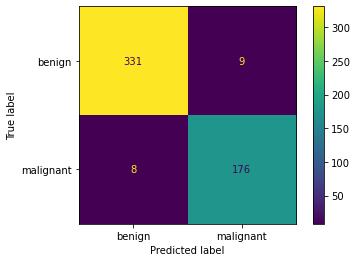

In [16]:
knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance')
y_cv = cross_val_predict(knn_model, x_train, y_train, cv=k, n_jobs=-1)
print('Result of training and testing a KNN model with 5-fold cross-valication:\n---')
show_result(y_cv, y_train)

Result of KNN classifier on the testing set:
---
              precision    recall  f1-score   support

           2       0.98      0.99      0.99       118
           4       0.98      0.96      0.97        57

    accuracy                           0.98       175
   macro avg       0.98      0.98      0.98       175
weighted avg       0.98      0.98      0.98       175



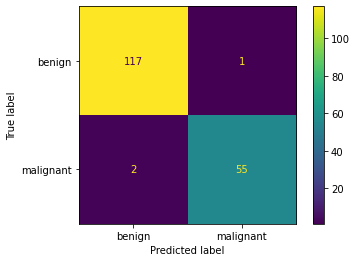

In [17]:
knn_model.fit(x_train, y_train)
y_knn = knn_model.predict(x_test)
print('Result of KNN classifier on the testing set:\n---')
show_result(y_knn)

### SVM Model

Result of training and testing a SVM model with 5-fold cross-valication:
---
              precision    recall  f1-score   support

           2       0.97      0.96      0.97       340
           4       0.93      0.95      0.94       184

    accuracy                           0.96       524
   macro avg       0.95      0.95      0.95       524
weighted avg       0.96      0.96      0.96       524



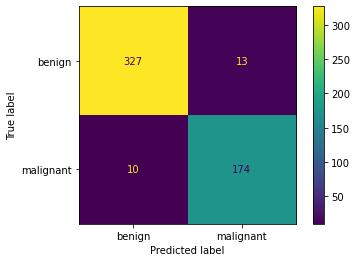

In [18]:
svm_model = SVC(C=3)
y_cv = cross_val_predict(svm_model, x_train, y_train, cv=k, n_jobs=-1)
print('Result of training and testing a SVM model with 5-fold cross-valication:\n---')
show_result(y_cv, y_train)

Result of SVM classifier on the testing set:
---
              precision    recall  f1-score   support

           2       0.99      0.99      0.99       118
           4       0.98      0.98      0.98        57

    accuracy                           0.99       175
   macro avg       0.99      0.99      0.99       175
weighted avg       0.99      0.99      0.99       175



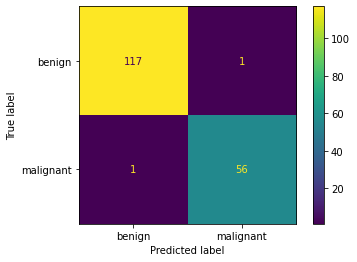

In [19]:
svm_model.fit(x_train, y_train)
y_svm = svm_model.predict(x_test)
print('Result of SVM classifier on the testing set:\n---')
show_result(y_svm)